# VISUALIZATION FOR TESTING

总共图数量: 2133
数据统计完成，开始分析异常值...

=== 图基本信息统计 ===
节点数 - 最小值: 2, 最大值: 101, 平均值: 16.63
边数 - 最小值: 1, 最大值: 104, 平均值: 19.50

=== 节点特征异常值分析 ===
length - 异常值范围: < -431.64 或 > 879.17, 异常值数量: 2723
width - 异常值范围: < 0.00 或 > 0.00, 异常值数量: 0
height_mean - 异常值范围: < -9.44 或 > 64.71, 异常值数量: 1525
frontage_L_mean - 异常值范围: < -45.00 或 > 139.00, 异常值数量: 2920
public_den - 异常值范围: < -0.03 或 > 0.06, 异常值数量: 2639
transport_den - 异常值范围: < -0.02 或 > 0.04, 异常值数量: 2948
nvdi_mean - 异常值范围: < 0.01 或 > 0.35, 异常值数量: 198
hop_level - 异常值范围: < -1.50 或 > 2.50, 异常值数量: 0
is_center - 异常值范围: < 0.00 或 > 0.00, 异常值数量: 2133

=== 边特征异常值分析 ===
intersection_x - 异常值范围: < 652937.67 或 > 685947.17, 异常值数量: 1553
intersection_y - 异常值范围: < 3513675.71 或 > 3571852.10, 异常值数量: 0


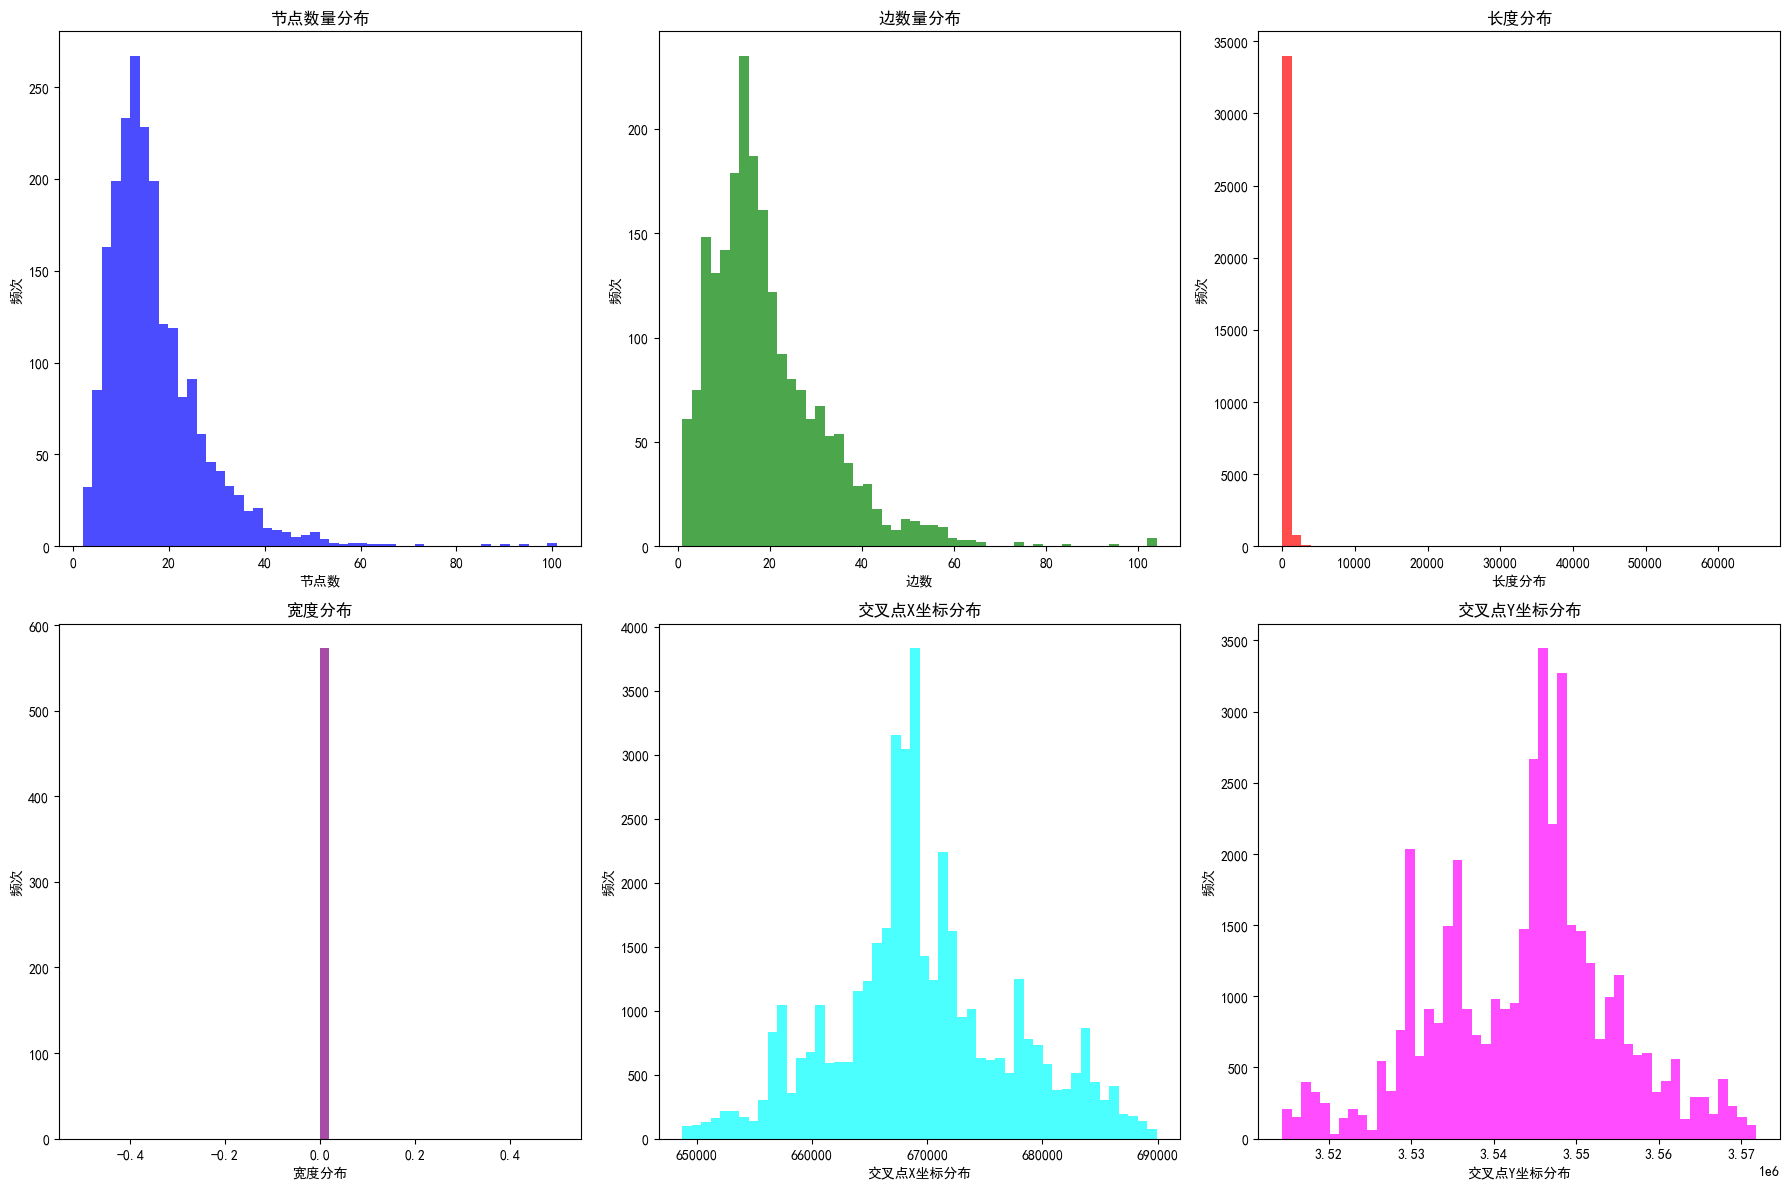


特征分布图已保存为 'feature_distributions.png'


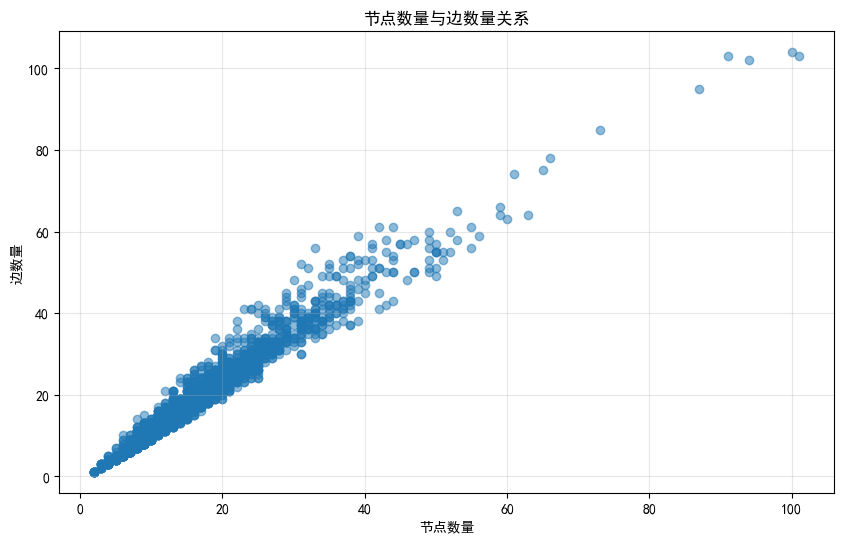

节点与边关系图已保存为 'nodes_edges_relationship.png'


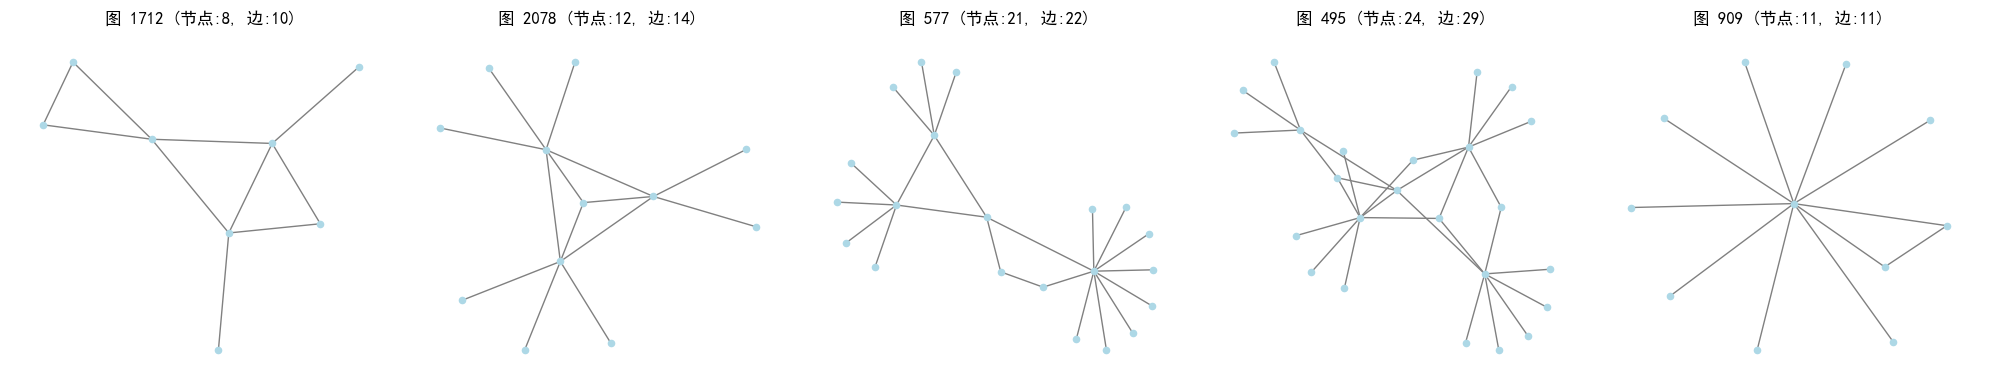

示例图结构已保存为 'sample_graphs_structure.png'


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import random

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def visualize_random_area(street_data, building_data, size=500):
    """
    随机截取指定大小的区域并可视化
    """
    # 获取整个数据集的边界
    bounds = street_data.total_bounds
    
    # 随机选择一个中心点
    center_x = random.uniform(bounds[0], bounds[2])
    center_y = random.uniform(bounds[1], bounds[3])
    
    # 创建500x500米的边界框
    half_size = size / 2
    bbox = box(center_x - half_size, center_y - half_size, 
               center_x + half_size, center_y + half_size)
    
    # 截取道路数据
    street_clip = street_data[street_data.geometry.intersects(bbox)]
    
    # 截取建筑数据
    building_clip = building_data[building_data.geometry.intersects(bbox)]
    
    # 创建子图
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'随机区域可视化 (中心: {center_x:.1f}, {center_y:.1f})', fontsize=16)
    
    # 1. 道路网络
    ax1 = axes[0, 0]
    street_clip.plot(ax=ax1, color='red', linewidth=1, alpha=0.8)
    building_clip.plot(ax=ax1, color='gray', alpha=0.6)
    ax1.set_title('道路网络 + 建筑')
    ax1.set_xlabel('X坐标')
    ax1.set_ylabel('Y坐标')
    
    # 2. 道路宽度可视化
    ax2 = axes[0, 1]
    if 'width' in street_clip.columns:
        street_clip.plot(column='width', ax=ax2, cmap='viridis', 
                        legend=True, linewidth=2)
        ax2.set_title('道路宽度')
    else:
        street_clip.plot(ax=ax2, color='blue', linewidth=1)
        ax2.set_title('道路网络')
    building_clip.plot(ax=ax2, color='lightgray', alpha=0.3)
    
    # 3. POI密度可视化
    ax3 = axes[1, 0]
    if 'count' in street_clip.columns:
        street_clip.plot(column='count', ax=ax3, cmap='Reds', 
                        legend=True, linewidth=2)
        ax3.set_title('POI密度')
    else:
        street_clip.plot(ax=ax3, color='green', linewidth=1)
        ax3.set_title('道路网络')
    building_clip.plot(ax=ax3, color='lightgray', alpha=0.3)
    
    # 4. 综合特征可视化
    ax4 = axes[1, 1]
    if 'public_den' in street_clip.columns:
        street_clip.plot(column='public_den', ax=ax4, cmap='Blues', 
                        legend=True, linewidth=2)
        ax4.set_title('公共设施密度')
    else:
        street_clip.plot(ax=ax4, color='purple', linewidth=1)
        ax4.set_title('道路网络')
    building_clip.plot(ax=ax4, color='lightgray', alpha=0.3)
    
    # 调整布局
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"截取区域统计:")
    print(f"道路段数量: {len(street_clip)}")
    print(f"建筑数量: {len(building_clip)}")
    if 'count' in street_clip.columns:
        print(f"POI密度范围: {street_clip['count'].min():.2f} - {street_clip['count'].max():.2f}")
    if 'width' in street_clip.columns:
        print(f"道路宽度范围: {street_clip['width'].min():.2f} - {street_clip['width'].max():.2f}")

# 使用示例
# 假设你已经加载了数据
street_data = gpd.read_file('data_for_test/Street.geojson')
building_data = gpd.read_file('data_for_test/meters_data/building_meters.shp')

# 调用函数
visualize_random_area(street_data, building_data, size=500)

In [6]:
import pickle

def quick_check_fields(pkl_path="models/data/route_graphs.pkl"):
    """快速查看route_graphs.pkl中的字段"""
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    print(f"总图数量: {len(route_graphs)}")
    
    # 查看第一个图的字段
    if route_graphs:
        G = route_graphs[6]['graph']
        
        print("\n=== 节点字段 ===")
        for node, attrs in list(G.nodes(data=True))[:3]:  # 只看第一个节点
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")
        
        print("\n=== 边字段 ===")
        for u, v, attrs in list(G.edges(data=True))[:2]:  # 只看第一条边
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")

# 运行
quick_check_fields()

总共图数量: 2133

=== 节点特征统计 ===
length:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 2.2154
  最大值: 65212.1052
  平均值: 610.5348
  中位数: 167.9734
  标准差: 3210.6263
width:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  唯一值数量: 4
    0.0: 573
    130: 877
    30: 16531
    55: 17486
height_mean:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 6.0000
  最大值: 198.0000
  平均值: 30.6495
  中位数: 28.7059
  标准差: 18.2272
frontage_L_mean:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 0.0602
  最大值: 2280.3483
  平均值: 64.1856
  中位数: 42.0000
  标准差: 104.4718
public_den:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 0.0001
  最大值: 12.3469
  平均值: 0.0240
  中位数: 0.0119
  标准差: 0.1103
transport_den:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 0.0000
  最大值: 6.6902
  平均值: 0.0171
  中位数: 0.0089
  标准差: 0.0600
nvdi_mean:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 0.0482
  最大值: 0.3812
  平均值: 0.1826
  中位数: 0.1780
  标准差: 0.0583
hop_level:
  总数: 35467
  有效值数量: 35467
  缺失值数量: 0
  最小值: 0.0000
  最大值: 1.0000
  平均值: 0.6979
  中位数: 1.0000
  标准差: 0.

节点数最少的10个图:
  图 24: 2 个节点
  图 198: 2 个节点
  图 888: 2 个节点
  图 1007: 2 个节点
  图 1016: 2 个节点
  图 1323: 2 个节点
  图 1332: 2 个节点
  图 1394: 2 个节点
  图 1557: 2 个节点
  图 1695: 2 个节点
  图 1696: 2 个节点
  图 1816: 2 个节点
  图 2054: 2 个节点
  图 2124: 2 个节点
  图 350: 3 个节点
  图 365: 3 个节点
  图 789: 3 个节点
  图 872: 3 个节点
  图 980: 3 个节点
  图 982: 3 个节点
  图 1017: 3 个节点
  图 1036: 3 个节点
  图 1106: 3 个节点
  图 1107: 3 个节点
  图 1130: 3 个节点
  图 1214: 3 个节点
  图 1254: 3 个节点
  图 1386: 3 个节点
  图 1706: 3 个节点
  图 1740: 3 个节点

节点数最多的10个图:
  图 1642: 101 个节点
  图 976: 100 个节点
  图 64: 94 个节点
  图 1792: 91 个节点
  图 1791: 87 个节点
  图 164: 73 个节点
  图 1188: 66 个节点
  图 410: 65 个节点
  图 709: 63 个节点
  图 1176: 61 个节点
  图 1647: 60 个节点
  图 346: 59 个节点
  图 68: 59 个节点
  图 384: 56 个节点
  图 1601: 55 个节点
  图 558: 55 个节点
  图 1612: 53 个节点
  图 108: 53 个节点
  图 1605: 52 个节点
  图 305: 52 个节点
  图 1607: 51 个节点
  图 1032: 51 个节点
  图 1611: 50 个节点
  图 1610: 50 个节点
  图 1609: 50 个节点
  图 1606: 50 个节点
  图 1122: 50 个节点
  图 1118: 50 个节点
  图 1636: 49 个节点
  图 1613: 49 个节点


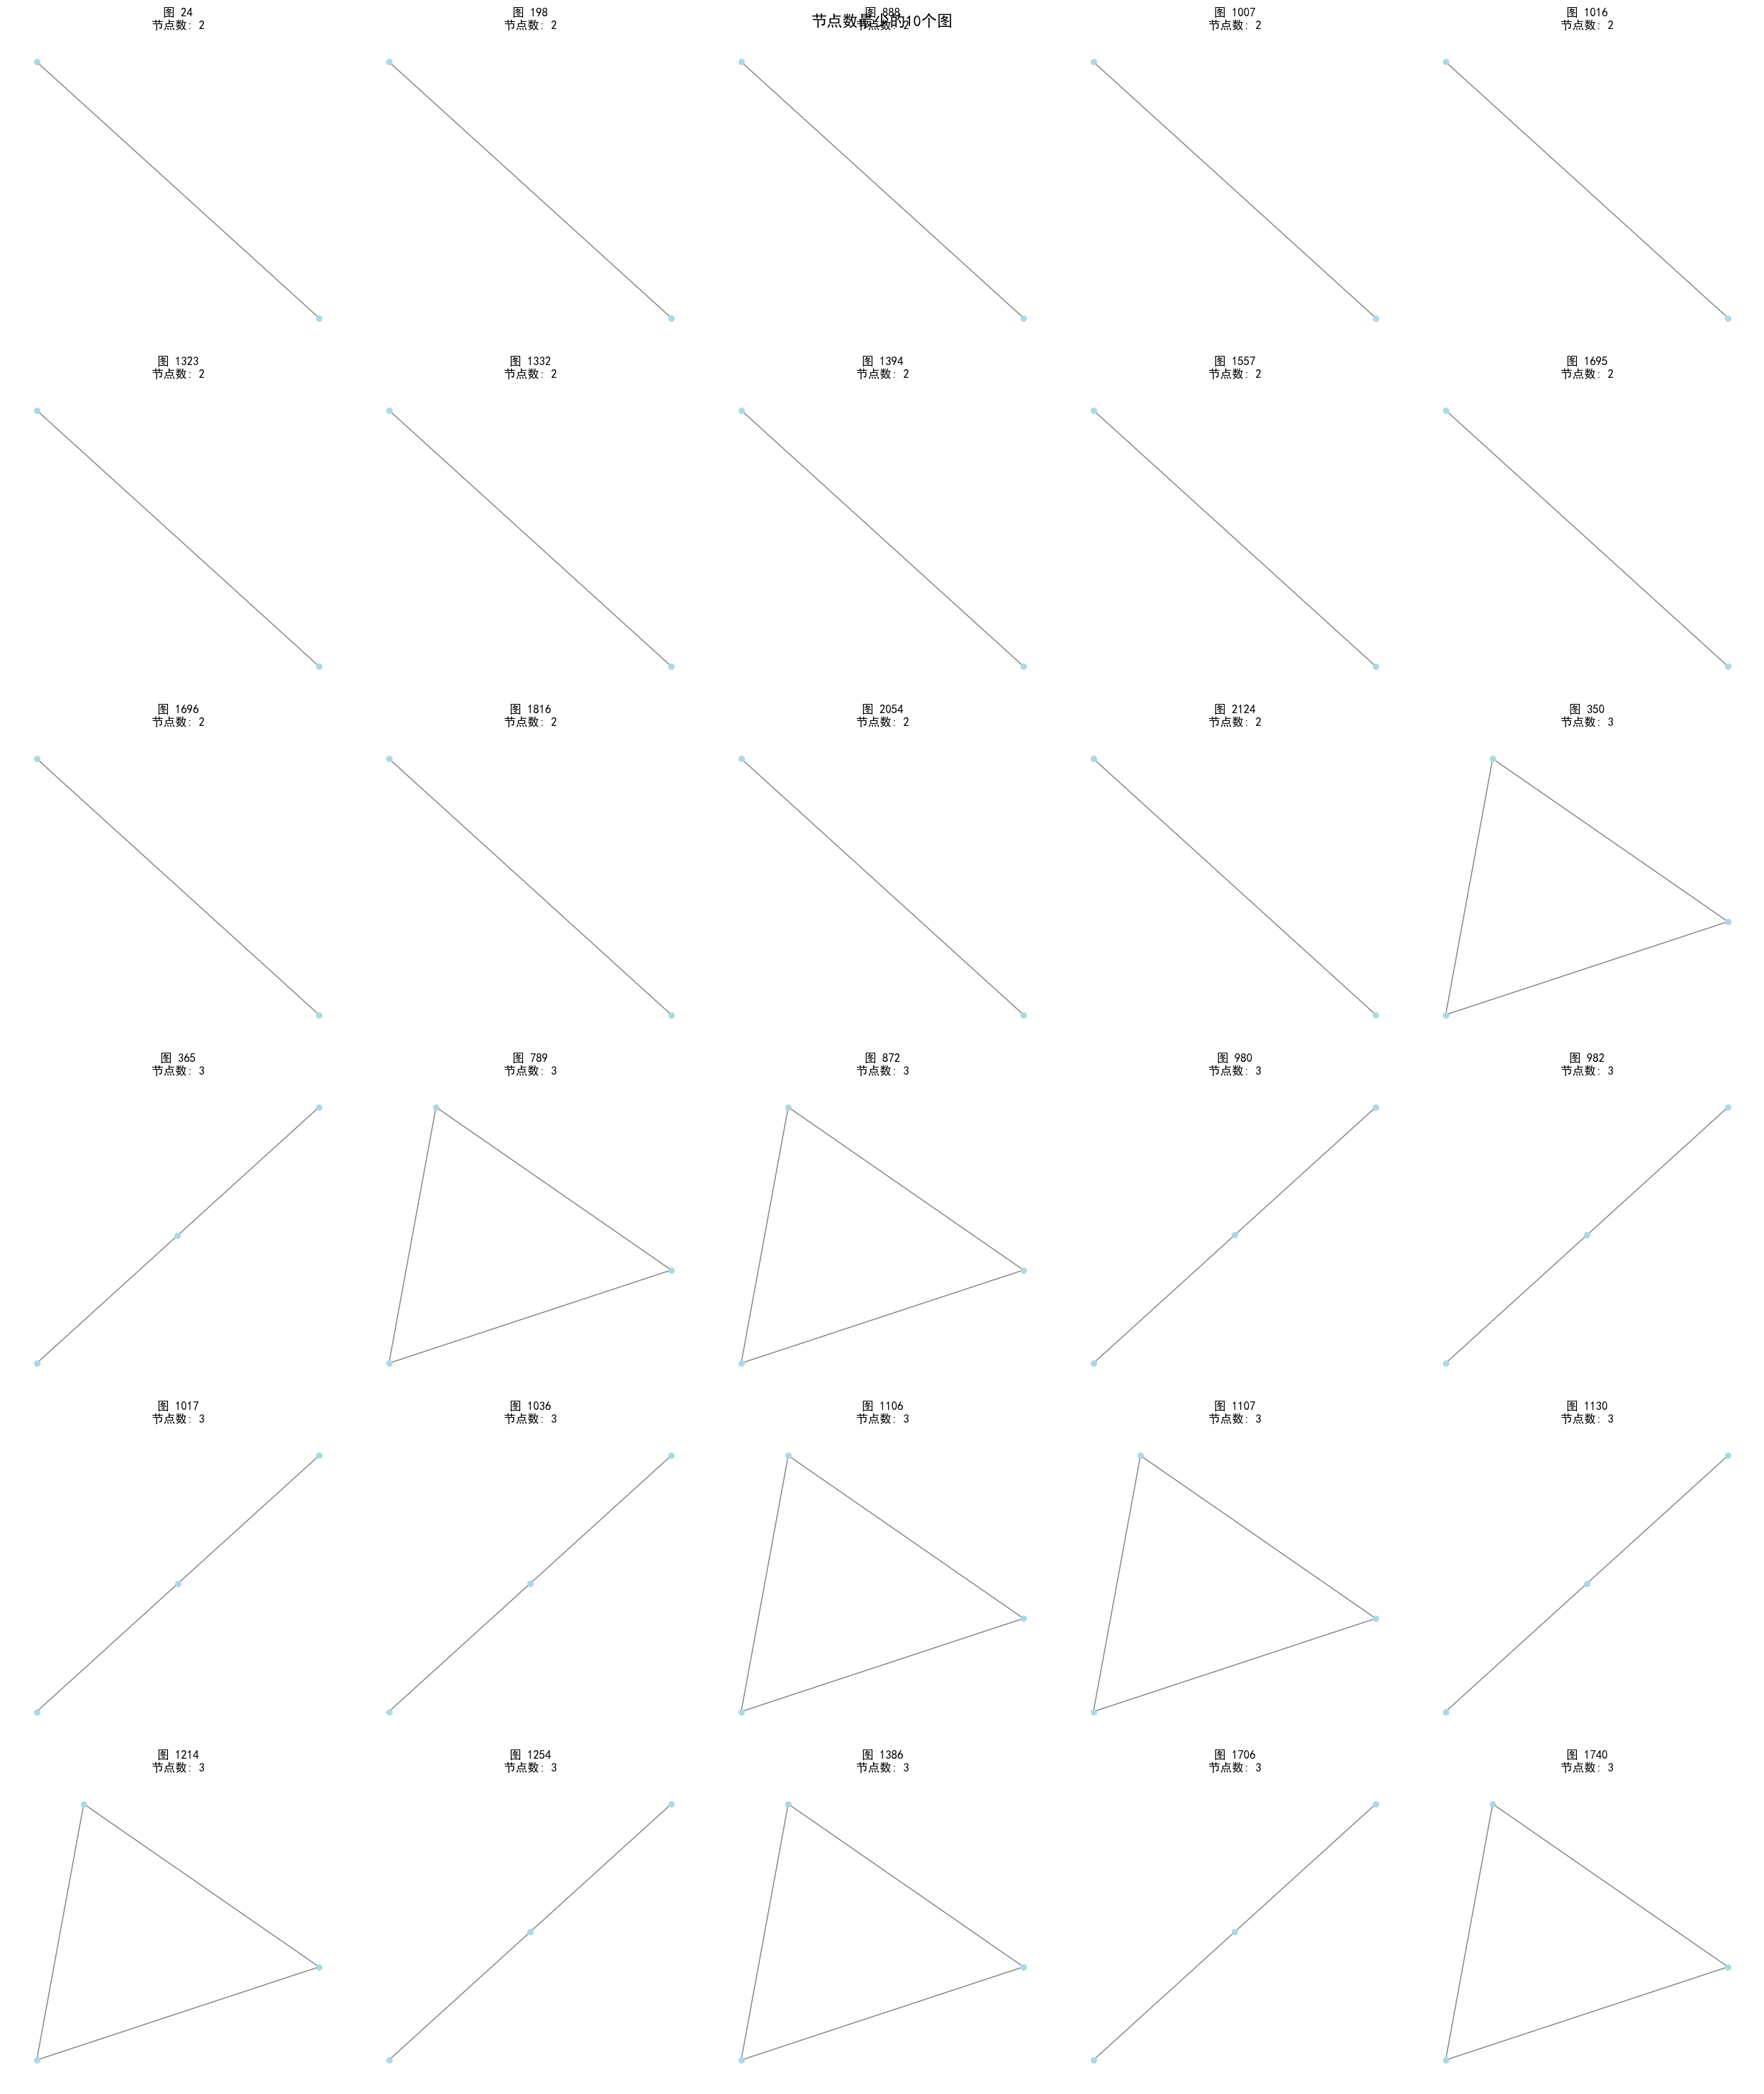


节点数最少的10个图已保存为 'smallest_graphs.png'


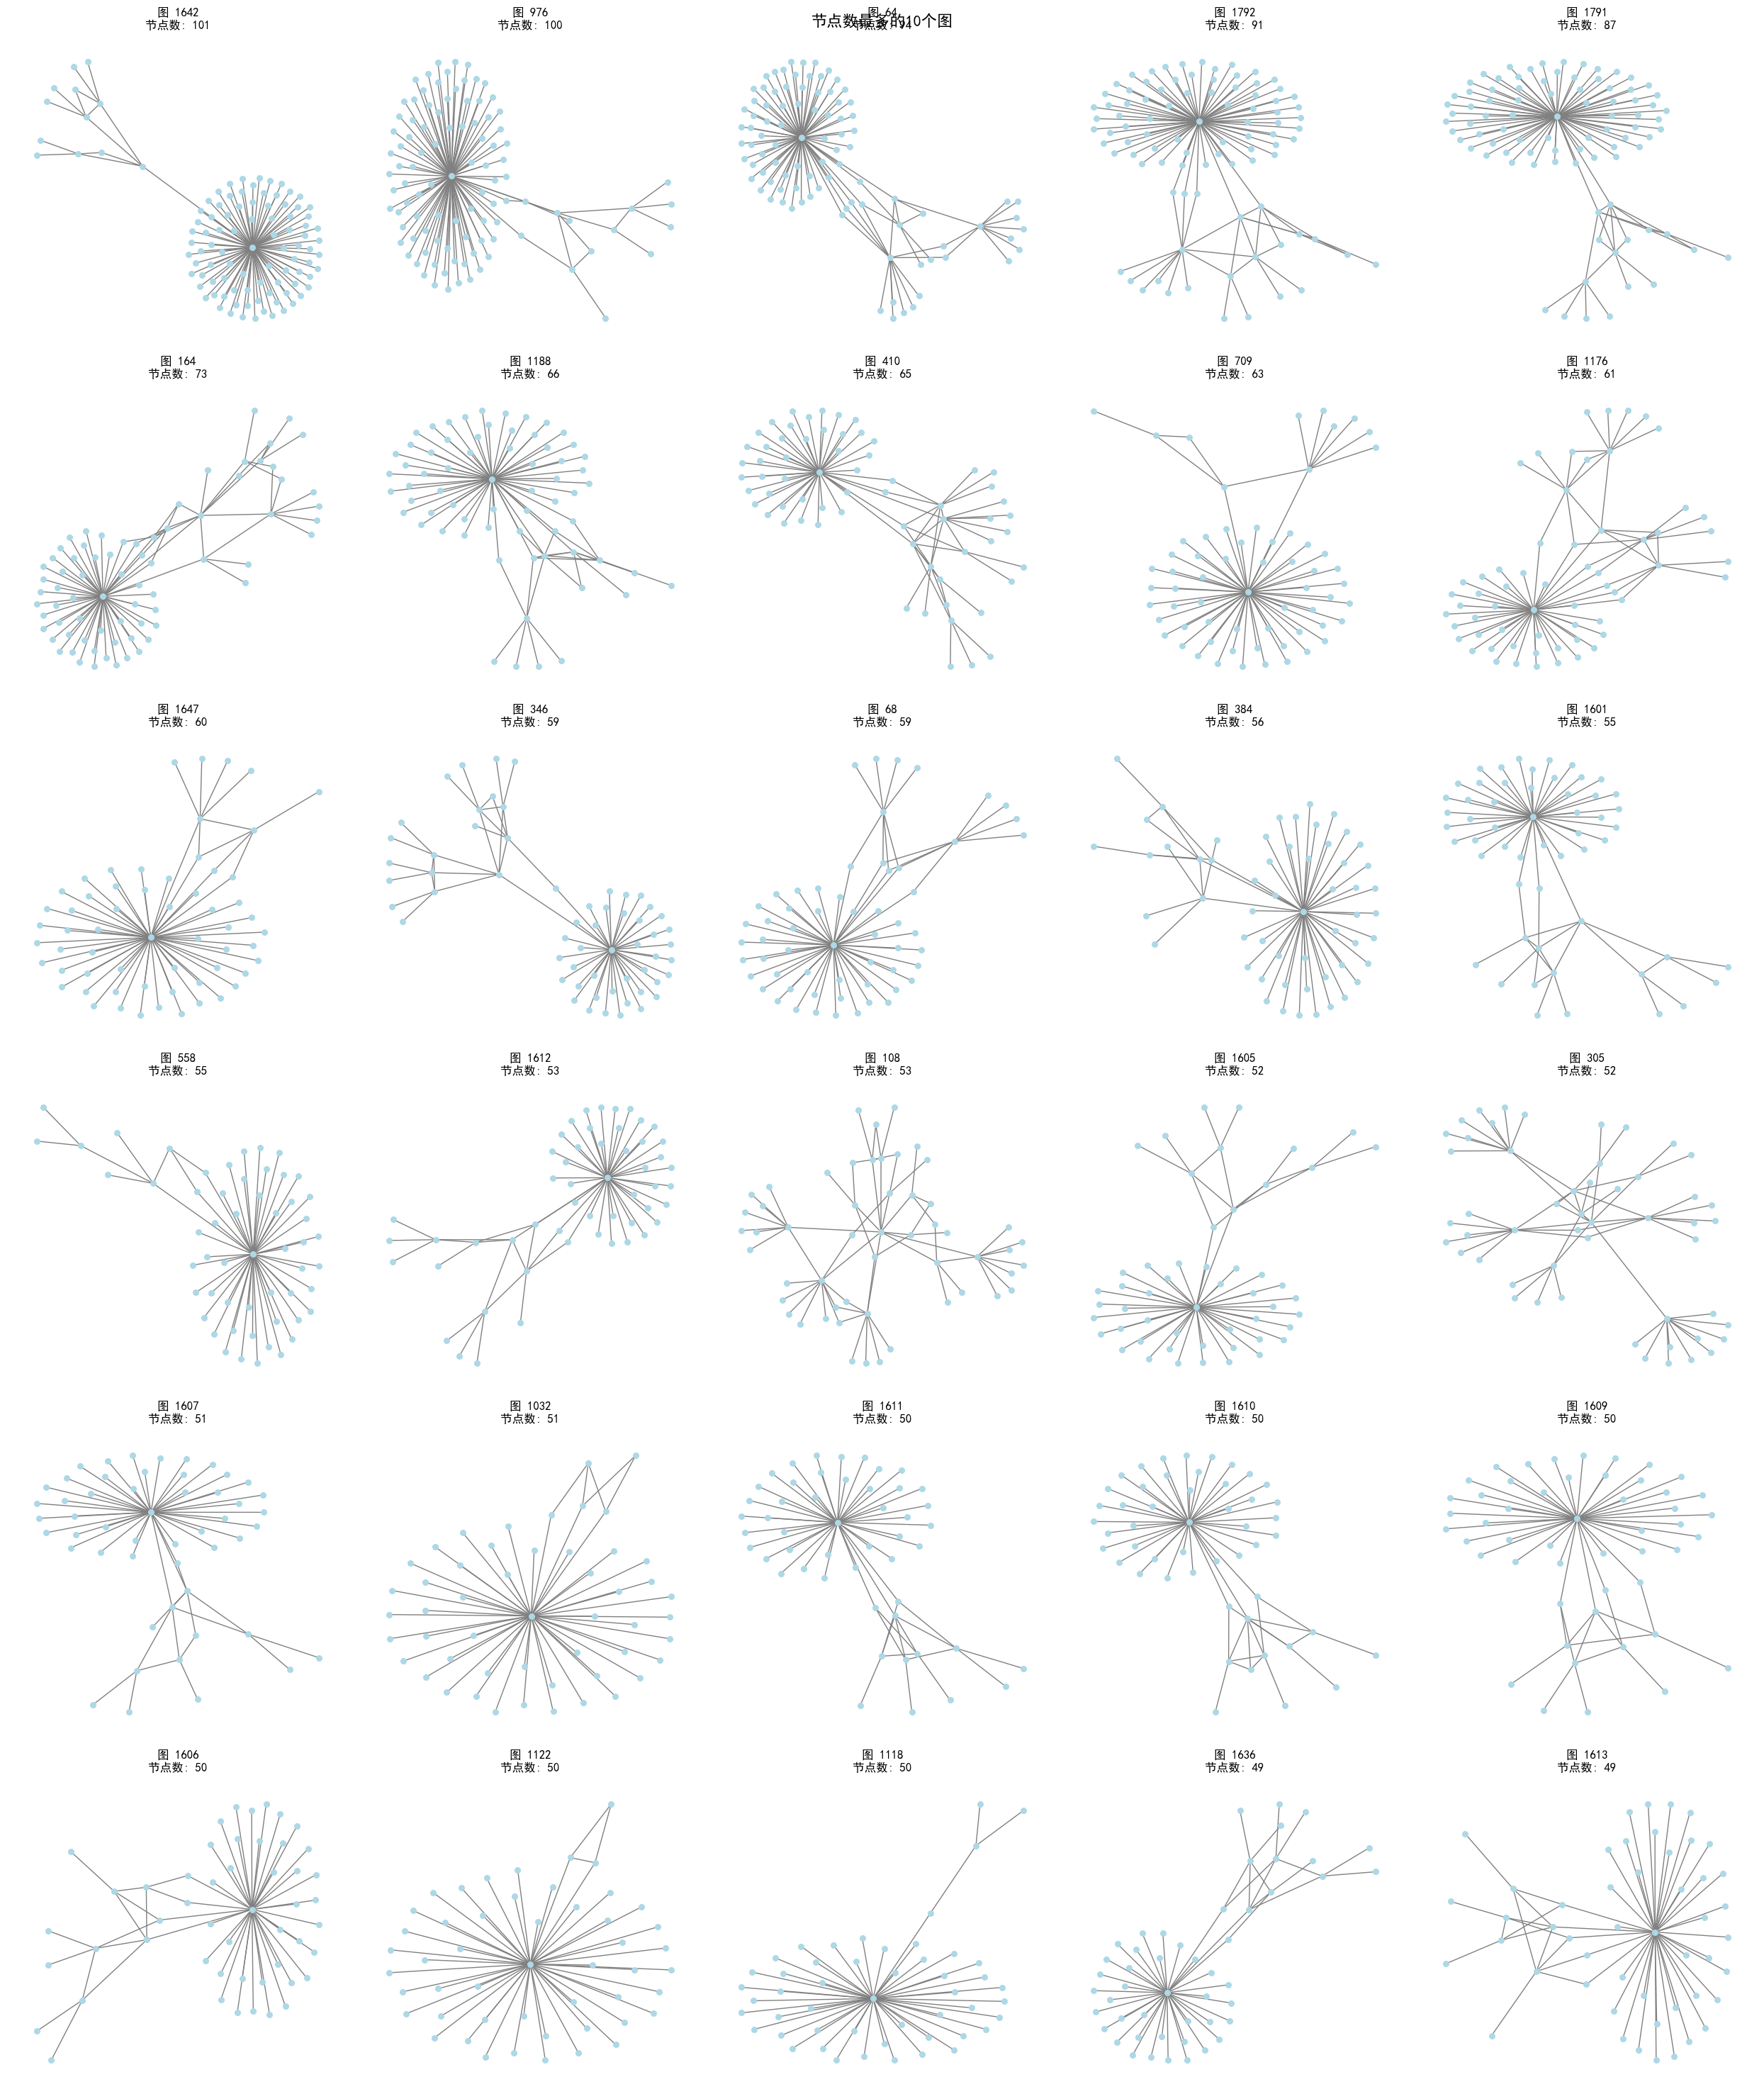

节点数最多的10个图已保存为 'largest_graphs.png'


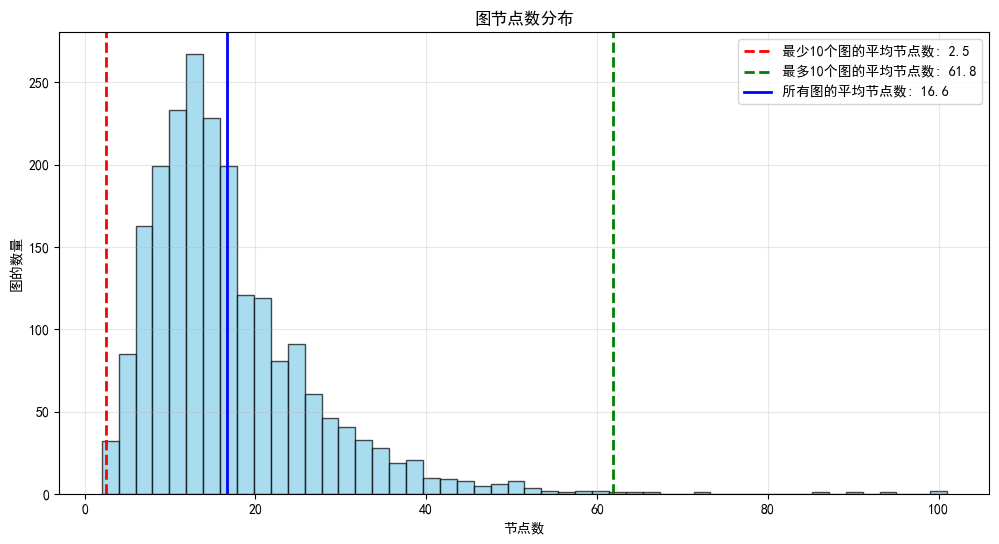

节点数分布图已保存为 'node_count_distribution.png'


In [10]:
import pickle
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def visualize_route_graphs(pkl_path, num_graphs=3):
    """
    从route_graphs.pkl中提取并可视化LineString
    
    Args:
        pkl_path: pkl文件路径
        num_graphs: 要可视化的图数量
    """
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    plt.figure(figsize=(30, 20))
    
    for i in range(min(num_graphs, len(route_graphs))):
        graph_data = route_graphs[i]
        nx_graph = graph_data['graph']
        
        color = plt.cm.tab10(i)
        
        for node, attrs in nx_graph.nodes(data=True):
            geometry = attrs.get('geometry')
            if geometry:
                # 检查geometry是否已经是LineString对象
                if isinstance(geometry, LineString):
                    line = geometry
                else:
                    # 如果是字符串，才需要解析
                    from shapely import wkt
                    line = wkt.loads(geometry)
                
                coords = list(line.coords)
                x_coords = [coord[0] for coord in coords]
                y_coords = [coord[1] for coord in coords]
                
                # 绘制LineString
                plt.plot(x_coords, y_coords, color=color, linewidth=1.5, alpha=0.7)
                
                # 在起点和终点添加特殊标记
                plt.plot(x_coords[0], y_coords[0], 'o', color=color, markersize=6, label='起点' if i == 0 and node == list(nx_graph.nodes())[0] else "")
                plt.plot(x_coords[-1], y_coords[-1], 's', color=color, markersize=6, label='终点' if i == 0 and node == list(nx_graph.nodes())[0] else "")
                
                # 在所有拐点处添加节点标记
                for j, (x, y) in enumerate(coords):
                    if j == 0:
                        # 起点用圆圈
                        plt.plot(x, y, 'o', color=color, markersize=4, alpha=0.8)
                    elif j == len(coords) - 1:
                        # 终点用方块
                        plt.plot(x, y, 's', color=color, markersize=4, alpha=0.8)
                    else:
                        # 中间拐点用小圆点
                        plt.plot(x, y, '.', color=color, markersize=3, alpha=0.6)
                    
                    # 可选：添加拐点编号标注
                    plt.annotate(f'{j}', (x, y), xytext=(2, 2), textcoords='offset points', 
                                fontsize=6, color=color, alpha=0.7)
    
    plt.xlabel('X坐标')
    plt.ylabel('Y坐标')
    plt.title(f'Route Graphs 可视化 (前{num_graphs}个图) - 拐点节点')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 使用
visualize_route_graphs("models/data/route_graphs.pkl", num_graphs=10)